In [1]:
# Librerias necesarias para funcionar
import numpy as np
import sympy as sp 
import matplotlib.pyplot as plt
from scipy import integrate

In [2]:
# Resolviendo las incognitas 
x = sp.Symbol('x')
y = sp.Function('y')

f = 2*x
sp.Eq(y(x).diff(x),f)

Eq(Derivative(y(x), x), 2*x)

In [3]:
# Resolviendo la ecuación 
sp.dsolve(y(x).diff(x)-f)

Eq(y(x), C1 + x**2)

## Con condicion inicial 

In [4]:
# definiendo la ecuación
eq = 1.0/2 * (y(x)**2 - 1)

# Condición inicial
ics = {y(0): 2}

# Resolviendo la ecuación
edo_sol = sp.dsolve(y(x).diff(x) - eq)
edo_sol

Eq(y(x), 1.0/tanh(C1 - x/2))

In [5]:
C_eq = sp.Eq(edo_sol.lhs.subs(x,0).subs(ics), edo_sol.rhs.subs(x,0))
C_eq

Eq(2, 1.0/tanh(C1))

In [6]:
sp.solve(C_eq)

[0.549306144334055, 0.549306144334055 + 3.14159265358979*I]

## Serie de potencias

In [7]:
# Solución con serie de potencias
f = y(x)**2
sp.dsolve(y(x).diff(x) - f)

Eq(y(x), -1/(C1 + x))

## Campos de direcciones
Funcion que dibuja el campo de dirección de una EDO

In [8]:
def campo_de_direccion(x,y_x,f_xy, x_lim=(-5,5), y_lim=(-5,5), ax = None):
    f_np = sp.lambdify((x, y_x), f_xy, modules="numpy")
    x_vec = np.linspace(x_lim[0],x_lim[1],20)
    y_vec = np.linspace(y_lim[0],y_lim[1],20)
    
    if ax is None:
        ax = plt.subplots(figsize=(4,4))
    dx = x_vec[1] - x_vec[0]
    dy = y_vec[1] - y_vec[0]
    
    for m, xx in enumerate(x_vec):
        for n, yy in enumerate(y_vec):
            Dy = f_np(xx,yy)*dx
            Dx = 0.8 * dx**2 / np.sqrt(dx**2 + Dy**2)
            Dy = 0.8 * Dy*dy / np.sqrt(dx**2 + Dy**2)
            ax.plot([xx - Dx/2, xx + Dx/2],
                   [yy - Dy/2, yy + Dy/2], 'b', lw=0.5)
    
    ax.axis('tight')
    ax.set_title(r"$%s$" %
                 (sp.latex(sp.Eq(y(x).diff(x), f_xy))),
                 fontsize=18)
    
    return ax
    

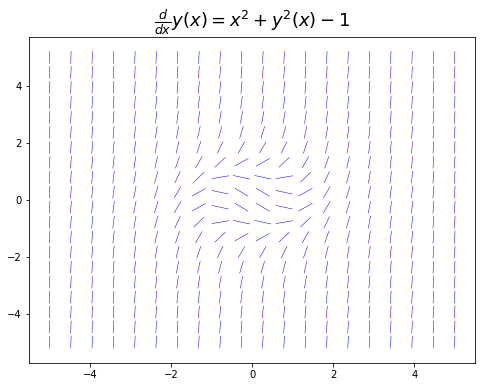

In [9]:

# Defino incognitas
x = sp.symbols('x')
y = sp.Function('y')

# Defino la función
f = y(x)**2 + x**2 -1

# grafico de campo de dirección
fig, axes = plt.subplots(1, 1, figsize=(8, 6))
campo_dir = campo_de_direccion(x, y(x), f, ax=axes)

## Transformada de Laplace

In [10]:
t = sp.symbols("t", positive=True)
y = sp.Function("y")



In [11]:
a0 = 3
k = 0
edo = y(t).diff(t,t) + a0*y(t).diff(t) + 2*y(t)
sp.Eq(edo, k)

Eq(2*y(t) + 3*Derivative(y(t), t) + Derivative(y(t), (t, 2)), 0)

In [12]:
s, Y = sp.symbols("s, Y", real=True)

In [13]:
L_edo = sp.laplace_transform(edo, t, s, noconds=True)
sp.Eq(L_edo,0)

Eq(2*LaplaceTransform(y(t), t, s) + 3*LaplaceTransform(Derivative(y(t), t), t, s) + LaplaceTransform(Derivative(y(t), (t, 2)), t, s), 0)

Ya que python nos devuelve un termino con la forma rara por lo que para resolver este inconveniente debemos crear una funcion que nos ayude a mostrarla de manera algebraica 

In [20]:
def laplace_transform_derivatives(e):
    """
    Evalua las transformadas de Laplace de derivadas de funciones sin evaluar.
    """
    if isinstance(e, sp.LaplaceTransform):
        if isinstance(e.args[0], sp.Derivative):
            d, t, s = e.args 
            n = len(d.args) - 1
            return ((s**n) * sp.LaplaceTransform(d.args[0], t, s) -
                    sum([s**(n-i) * sp.diff(d.args[0], t, i-1).subs(t, 0)
                         for i in range(1, n+1)]))
        
    if isinstance(e, (sp.Add, sp.Mul)):
        t = type(e) 
        return t(*[laplace_transform_derivatives(arg) for arg in e.args])
    
    return e

Aplicamos la nueva funcion para evaluar las transformadas de Laplace de derivadas

In [22]:
L_edo_2 = laplace_transform_derivatives(L_edo)
sp.Eq(L_edo_2,0)

Eq(4*s*LaplaceTransform(y(t), t, s) + 2*LaplaceTransform(y(t), t, s) - 4*y(0), 0)

Reemplazamos la transformada de Laplace de y(t) por la incognita y para facilitar la lectura de la ecuación 

In [32]:
L_edo_3 = L_edo_2.subs(sp.laplace_transform(y(t),t,s),Y)
sp.Eq(L_edo_3)

Eq(4*Y*s + 2*Y - 4*y(0), 0)

Definimos las condiciones iniciales

In [33]:
ics = {y(0) : 2, y(t).diff(t).subs(t,0) : -3}
ics

{y(0): 2, Subs(Derivative(y(t), t), t, 0): -3}

In [34]:
L_edo_4 = L_edo_3.subs(ics)
L_edo_4

4*Y*s + 2*Y - 8

In [35]:
Y_sol = sp.solve(L_edo_4, Y)
Y_sol

[4/(2*s + 1)]

In [36]:
y_sol = sp.inverse_laplace_transform(Y_sol[0], s, t)
y_sol

2*exp(-t/2)

In [37]:
y_sol.subs(t, 0), sp.diff(y_sol).subs(t, 0) # Revisar

(2, -1)